In [1]:
# Import libraries i will need
import os
import random as python_random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import gc
import re

#import the libraries necessary for confusion plot
import seaborn as sns
from matplotlib import colors

In [2]:
# read in the data
df_small = pd.read_csv('../data/processed/image-features/local_features_20m.csv') 
df_large = pd.read_csv('../data/processed/image-features/large_features_100m.csv') 

In [3]:
df_large.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 10000 entries, 0 to 9999
dtypes: float64(10000)
memory usage: 76.3 MB


In [4]:
# might've been easier to do this earlier in R, but need to figure out which rows belong to what
inputPath="../data/processed/cam-2017-20m" # 5495 files
filelist = []

# Load the images, and append them to a list.
for filepath in os.listdir(inputPath):
    if filepath.endswith((".tif")):
    #print(filepath)
        tempfile=inputPath+'/{0}'.format(filepath)
        filelist.append(tempfile)

In [5]:
len(filelist[:2200]) 

2200

In [6]:
filelist_trim =[re.sub('../data/processed/cam-2017-20m/cambdrige-20m-', '', file) for file in filelist]
filelist_trim =[re.sub('.tif', '', file) for file in filelist_trim]
df_small['id_col'] = filelist_trim[:2200]
df_small.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,id_col
0,0.001205,0.005004,0.004743,0.000182,0.007986,0.002908,0.000000,0.002409,0.009945,0.003346,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,point-1
1,0.002179,0.006240,0.006309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,point-10
2,0.019810,0.012456,0.004468,0.000000,0.000000,0.005599,0.013208,0.000000,0.025515,0.015596,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,point-1000
3,0.016079,0.023360,0.002660,0.014574,0.000000,0.000000,0.002571,0.009957,0.007327,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,point-1001
4,0.010280,0.011240,0.000000,0.000000,0.001415,0.028210,0.015327,0.021854,0.009842,0.013704,...,0.012584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,point-1002


In [7]:
# might've been easier to do this earlier in R, but need to figure out which rows belong to what
inputPath="../data/processed/cam-2017-100m" # 5495 files
filelist = []

# Load the images, and append them to a list.
for filepath in os.listdir(inputPath):
    if filepath.endswith((".tif")):
    #print(filepath)
        tempfile=inputPath+'/{0}'.format(filepath)
        filelist.append(tempfile)

In [8]:
filelist_trim =[re.sub('../data/processed/cam-2017-100m/cambdrige-100m-', '', file) for file in filelist]
filelist_trim =[re.sub('.tif', '', file) for file in filelist_trim]
df_large['id_col'] = filelist_trim[:1000]
df_large.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,id_col
0,0.070402,0.040430,0.031767,0.031081,0.046301,0.066976,0.024759,0.015722,0.023196,0.021940,...,0.000000,0.000000,0.001782,0.000000,0.000351,0.000000,0.000430,0.019142,0.000000,point-1
1,0.050474,0.000000,0.038055,0.000000,0.000000,0.006756,0.016238,0.013577,0.015716,0.013670,...,0.000000,0.000000,0.006987,0.008010,0.013388,0.000000,0.010781,0.041079,0.008465,point-10
2,0.048996,0.024623,0.031339,0.051936,0.000000,0.025589,0.023514,0.081062,0.000000,0.026476,...,0.033831,0.031421,0.000000,0.000000,0.000000,0.000000,0.012925,0.053861,0.000000,point-1000
3,0.042698,0.000000,0.025461,0.021107,0.005198,0.007447,0.005551,0.051199,0.007671,0.031407,...,0.000000,0.026834,0.056952,0.001201,0.006320,0.047817,0.052337,0.060615,0.031976,point-1001
4,0.023891,0.009476,0.038914,0.006399,0.000266,0.000000,0.000040,0.040400,0.005640,0.026626,...,0.033326,0.007383,0.003979,0.027645,0.000000,0.000000,0.004652,0.024096,0.024652,point-1002


In [9]:
# if it has a large, it should have a corresponding small, not the case the other way around
all_features = df_large.merge(df_small, on='id_col', how='left')

In [10]:
# here is all off the data
id_column = all_features["id_col"] # keep the ids for later
all_features = all_features.drop('id_col', axis=1) # drop id column
all_features.head()

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,390_y,391_y,392_y,393_y,394_y,395_y,396_y,397_y,398_y,399_y
0,0.070402,0.040430,0.031767,0.031081,0.046301,0.066976,0.024759,0.015722,0.023196,0.021940,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.050474,0.000000,0.038055,0.000000,0.000000,0.006756,0.016238,0.013577,0.015716,0.013670,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.048996,0.024623,0.031339,0.051936,0.000000,0.025589,0.023514,0.081062,0.000000,0.026476,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.042698,0.000000,0.025461,0.021107,0.005198,0.007447,0.005551,0.051199,0.007671,0.031407,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.023891,0.009476,0.038914,0.006399,0.000266,0.000000,0.000040,0.040400,0.005640,0.026626,...,0.0,0.012584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
all_features.isnull().sum()
all_features=all_features.dropna()

In [12]:
all_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 0 to 642
Columns: 10400 entries, 0_x to 399_y
dtypes: float64(10400)
memory usage: 51.0 MB


In [17]:
# define the model
cluster_model = KMeans(n_clusters=40)
# fit the model
cluster_model.fit(all_features)

C:\Users\jfrancis\Anaconda3\envs\envAIGOV\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=40)

In [18]:
# assign a cluster to each example
yhat = cluster_model.predict(all_features)
# retrieve unique clusters
clusters = np.unique(yhat)

In [19]:
all_features["yhat"]=yhat

In [20]:
clusters

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [21]:
all_features.describe()

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,391_y,392_y,393_y,394_y,395_y,396_y,397_y,398_y,399_y,yhat
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,...,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000
mean,0.054354,0.010084,0.022136,0.021365,0.019557,0.019561,0.020340,0.020547,0.018749,0.018455,...,0.000606,0.000795,0.000358,0.000528,0.000620,0.000824,0.000765,0.000806,0.000013,16.583204
std,0.028981,0.015580,0.021807,0.023177,0.022903,0.022092,0.021770,0.021981,0.020971,0.019609,...,0.003537,0.004138,0.002144,0.002911,0.002907,0.004040,0.003609,0.004093,0.000197,10.928278
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.034464,0.000000,0.000110,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,0.050486,0.000000,0.017220,0.015488,0.012732,0.012249,0.015723,0.015695,0.012961,0.013364,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
75%,0.069929,0.015044,0.035766,0.033358,0.030893,0.032416,0.032643,0.032657,0.029900,0.030206,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000
max,0.191166,0.088758,0.137407,0.145016,0.129958,0.114889,0.113663,0.141784,0.126418,0.106815,...,0.039962,0.066724,0.030471,0.038479,0.036827,0.045895,0.040884,0.042364,0.004141,39.000000


<AxesSubplot: >

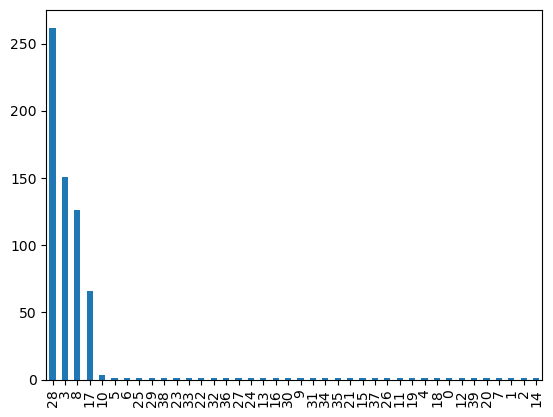

In [22]:
all_features["yhat"].value_counts().plot(kind='bar')

In [23]:
# could try only keep variables with std above some number
all_features2=all_features.loc[:, all_features.std() > .03]

In [24]:
all_features2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 0 to 642
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   199_x   643 non-null    float64
 1   299_x   643 non-null    float64
 2   399_x   643 non-null    float64
 3   499     643 non-null    float64
 4   699     643 non-null    float64
 5   1299    643 non-null    float64
 6   1699    643 non-null    float64
 7   2599    643 non-null    float64
 8   2699    643 non-null    float64
 9   2799    643 non-null    float64
 10  2899    643 non-null    float64
 11  2999    643 non-null    float64
 12  3099    643 non-null    float64
 13  3499    643 non-null    float64
 14  3599    643 non-null    float64
 15  3699    643 non-null    float64
 16  4199    643 non-null    float64
 17  4599    643 non-null    float64
 18  4699    643 non-null    float64
 19  4899    643 non-null    float64
 20  4999    643 non-null    float64
 21  5699    643 non-null    float64
 22  58

In [34]:
# define the model
cluster_model = KMeans(n_clusters=20)
all_features2 = all_features2.drop('yhat', axis=1) # drop id column
# fit the model
cluster_model.fit(all_features2)
# assign a cluster to each example
yhat2 = cluster_model.predict(all_features2)
all_features2["yhat"]=yhat2
all_features2["yhat"].value_counts().plot(kind='bar')

ValueError: could not convert string to float: 'point-1'

In [27]:
all_features2["id_col"]=id_column
clustered_data = all_features2[['id_col', 'yhat']].copy()

In [35]:
all_features2["yhat"].value_counts()

KeyError: 'yhat'

In [43]:
clustered_data.head(-100)

,id_col,yhat
0,point-1,17
1,point-10,17
2,point-1000,19
3,point-1001,18
4,point-1002,13
...,...,...
538,point-195,7
539,point-196,18
540,point-197,5
541,point-198,11
